In [2]:
# import dependencies 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:

# developing the model (logistic regression)
class ScratchLogisticRegression():
    
    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1/0.01
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _check_for_bais(self,X):
        if self.bias == True:
            x1 = np.ones(X.shape[0])
        else:
            x1 = np.zeros(X.shape[0])
        
        return np.concatenate([x1.reshape(-1,1),X],axis=1)
        
        
    def _sigmoid_function(self,X):
        linear_model = np.dot(X,self.theta)
        
        return 1/(1+np.exp(-linear_model))
    
    def _gradient_descent(self, X, error):
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
    def _loss_function(self, y, y_pred):
        return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        X = self._check_for_bais(X)
        
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            y_pred = self._sigmoid_function(X)
            error = y_pred - y            
            self.loss[i] = self._loss_function(y,y_pred)
            
            if (type(X_val) != bool):
                val_X = self._check_for_bais(X_val)
                val_ypred = self._sigmoid_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_ypred)
            
            self._gradient_descent(X, error)
            
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
            
        np.save('theta', self.theta)            

    def predict(self, X):
        X = self._check_for_bais(X)
        y_pred = self._sigmoid_function(X)
        
        return np.where(y_pred<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        X = self._check_for_bais(X)
        return self._sigmoid_function(X)

### Problem 1-2
They implemented in the above class

### Problem 3
Estimation

In [4]:
# creating datasets
from sklearn import datasets
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [5]:
# spliting the datasets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# creating an instance of our model
l_regression = ScratchLogisticRegression(num_iter=1000, lr=0.001, verbose=False)
l_regression.fit(X_train,y_train,X_test,y_test)
y_pred_label = l_regression.predict(X_test)
y_pred_proba = l_regression.predict_proba(X_test)

print("Labels ",y_pred_label)
print("Probability:",y_pred_proba)

C:\Users\diveintocode\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
C:\Users\diveintocode\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
C:\Users\diveintocode\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


Labels  [0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0]
Probability: [1.90378276e-144 5.62659410e-045 2.16604671e-057 4.26844883e-111
 2.89648444e-013 3.41952288e-028 2.20067310e-001 2.84516814e-017
 9.99999999e-001 9.99996449e-001 5.85566498e-096 1.36720724e-090
 1.00000000e+000 6.59132659e-132 1.17503194e-097 6.93064206e-224
 1.00000000e+000 0.00000000e+000 5.85022868e-168 0.00000000e+000
 1.67184011e-210 2.02826829e-149 4.08322434e-063 2.74406760e-047
 1.91776794e-212 5.66086197e-070 1.14335662e-038 1.60397433e-052
 1.49418503e-062 0.00000000e+000 4.17669134e-037 0.00000000e+000
 2.25839078e-075 4.29558537e-226 1.27703099e-006 3.48288230e-189
 1.92541281e-087 6.02844026e-309 1.29689229e-077 3.15674276e-197
 2.62681219e-133 8.54969522e-002 3.10778253e-220 5.10920973e-008
 1.68131749e-087 0.00000000e+00

### Problem 4

created in the class above (Objective function)

### Problem 5
Learning and estimation


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
data = load_iris().data
target = load_iris().target.reshape(-1,1)
iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
X_1 = iris.loc[iris[4]!=0,2:3].values
y_1 = iris.loc[iris[4]!=0,4].values

In [8]:
# spliting the datasets into training and testing subsets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)
X_test_1= scaler.transform(X_test_1)

# creating an instance of our model
l_regression_1 = ScratchLogisticRegression(num_iter=500, lr=0.01, verbose=False)
l_regression_1.fit(X_train_1,y_train_1,X_test_1,y_test_1)
y_pred_label_1 = l_regression_1.predict(X_test_1)
y_pred_proba_1 = l_regression_1.predict_proba(X_test_1)

print("y pred:",y_pred_label_1)

y pred: [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1.]


In [11]:
accuracy = accuracy_score(y_test_1, y_pred_label_1)
precision = precision_score(y_test_1, y_pred_label_1, average='weighted')
recall = recall_score(y_test_1, y_pred_label_1, average='weighted')

print("-------------")
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

-------------
accuracy 0.95
precision 0.9545454545454545
recall 0.95


### Problem 6

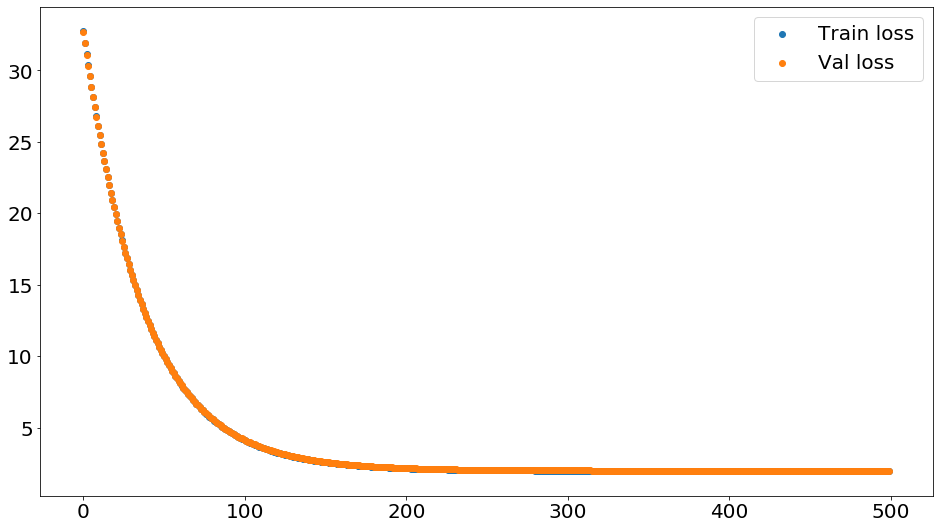

In [133]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regression_1.loss)),l_regression_1.loss,label='Train loss')
plt.scatter(range(len(l_regression_1.val_loss)),l_regression_1.val_loss,label='Val loss')
plt.legend();

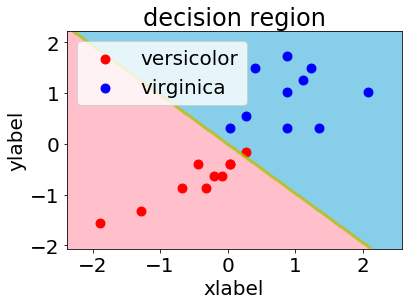

In [159]:
# problem 7
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_test_1, y_test_1, l_regression_1)

### Problem 8

In [109]:
import pickle 

pickle.dumps(l_regression_1.weights)

b'\x80\x03cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02C\x01bq\x03\x87q\x04Rq\x05(K\x01K\x04\x85q\x06cnumpy\ndtype\nq\x07X\x02\x00\x00\x00f8q\x08K\x00K\x01\x87q\tRq\n(K\x03X\x01\x00\x00\x00<q\x0bNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x0cb\x89C E\xf8(\\\xefO\xca@\xc1\xba\x1e\x85oJ\xb1@4\xba\x1e\x85\xd7(\xc5@\xf5S\xb8\x1eU\xd9\x9f@q\rtq\x0eb.'

In [110]:
from tempfile import TemporaryFile

outfile = TemporaryFile()
np.savez(outfile, l_regression_1.weights)